# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [3]:
#seu código aqui
df.info()

# Como não há dados faltantes, não é necessário fazer a substituição ou remoção.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


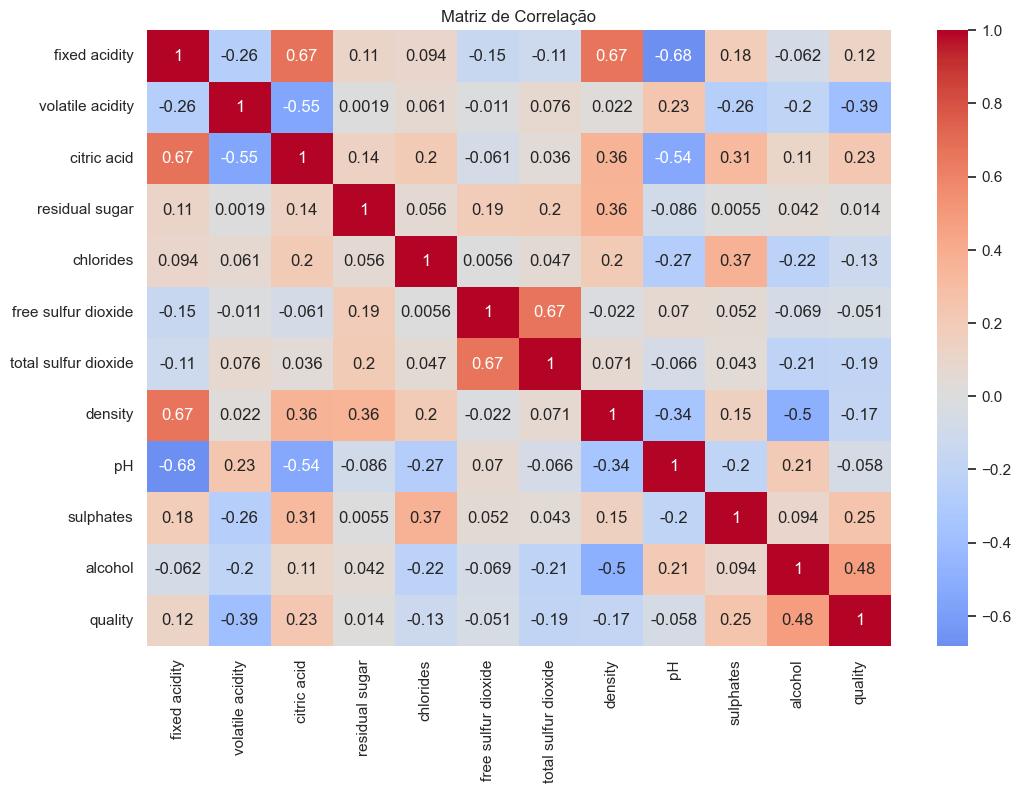


Ranking de Correlação com o alvo: 
alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
fixed acidity           0.124052
pH                     -0.057731
free sulfur dioxide    -0.050656
Name: quality, dtype: float64

Features Negativas: 
volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
Name: quality, dtype: float64

Top 3 Features Negativas: 
['volatile acidity', 'total sulfur dioxide', 'density']

Features Positivas e Negativas Selecionadas: 
['citric acid', 'sulphates', 'alcohol', 'volatile acidity', 'total sulfur dioxide', 'density']

Novo DataFrame com Features Selecionadas: 
   citric acid  sulphates  alcohol  volatile acidity  total sulfur dioxide  \
0     

In [45]:
#seu código aqui


# Identificando outliers
df.describe()

# Verificando o balanceamento da variável Target
print(df['quality'].value_counts())

# Visualizando a correlação entre as variáveis
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

import numpy as np

target = 'quality'

# correlação com o alvo (Pearson)
corr = df.corr(numeric_only=True)
corr_target = corr[target].drop(target).sort_values(key=np.abs, ascending=False)

# ver ranking
print(f'\nRanking de Correlação com o alvo: \n{corr_target.head(10)}')

thr_pos = 0.20
corr = df.corr(numeric_only=True)['quality'].drop('quality')

features_pos = corr.index[corr >= thr_pos].tolist()   # mais positivamente correlacionadas

# 1) Visualizando as correlações negativas disponíveis (ordenadas da mais negativa)
corr = df.corr(numeric_only=True)[target].drop(target)
neg_candidates = corr[corr < 0].sort_values()  # mais negativas no topo
print(f'\nFeatures Negativas: \n{neg_candidates}')

# 2) Selecionando as 3 features mais negativamente correlacionadas com a target
features_neg = neg_candidates.index[:3].tolist()
print(f'\nTop 3 Features Negativas: \n{features_neg}')

# junta e (opcional) remove duplicatas preservando a ordem
features = list(dict.fromkeys(features_pos + features_neg))
# seleciona colunas
df_thr = df[features + ['quality']].copy()

print(f'\nFeatures Positivas e Negativas Selecionadas: \n{features}')

print(f'\nNovo DataFrame com Features Selecionadas: \n{df_thr.head()}')



# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [48]:
#seu código aqui

# Separando em X (variáveis de entrada) e Y (variável de saída)
X = df_thr.drop('quality', axis=1)  # X contém todas as colunas exceto 'quality'
Y = df_thr['quality']  # Y contém apenas a coluna 'quality'

# Separar em base de treino e teste (usando 80% para treino e 20% para teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Balanceamento dos dados com SMOTE visto que variável target está desbalanceada na etapa de pré processamento (2)
from imblearn.over_sampling import SMOTE

# Preparação Final (só no treino)
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)




# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [49]:
#seu código aqui

# Iniciando o modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=400, random_state=42)

# Treinando o modelo
modelo.fit(X_train_balanced, Y_train_balanced)

# Fazendo previsões no conjunto de teste
Y_pred = modelo.predict(X_test)





# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [50]:
#seu código aqui

# Avaliando o modelo
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)


Acurácia: 0.61
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.30      0.17        10
           5       0.75      0.73      0.74       130
           6       0.67      0.55      0.60       132
           7       0.49      0.62      0.55        42
           8       0.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.34      0.37      0.34       320
weighted avg       0.65      0.61      0.63       320

Matriz de Confusão:
 [[ 0  1  0  0  0  0]
 [ 1  3  4  2  0  0]
 [ 1  7 95 23  4  0]
 [ 0 14 26 72 18  2]
 [ 0  1  1 11 26  3]
 [ 0  0  0  0  5  0]]


# Análise dos Resultados

## Classes Extremas (3 e 8)
- **Precision e Recall = 0**: modelo não conseguiu prever nenhuma amostra dessas classes
- **Support muito baixo**: apenas 1 e 5 amostras → pouquíssimos exemplos para avaliar

## Classe 4 (Minoritária)
- **Precision = 0.12**: de tudo que previu como 4, só 12% estava correto
- **Recall = 0.30**: das amostras realmente 4, identificou apenas 30%
- **Support = 10**: poucos exemplos

## Classes Majoritárias (5 e 6)
- **Melhores métricas**: F1 = 0.74 e 0.60
- **Alto support**: 130 e 132 amostras
- **Comportamento**: modelo favorece estas classes

## Classe 7 (Intermediária)
- **Performance**: moderada (F1 = 0.55)
- **Support = 42**: quantidade razoável de amostras

## Métricas Globais
- **Accuracy = 0.61**: não é representativa devido ao desbalanceamento
- **Macro avg (0.34) << Weighted avg (0.63)**: confirma forte desbalanceamento
- **Matriz de Confusão**: mostra confusão entre classes vizinhas (ex: 5↔6, 6↔7)

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [51]:
#seu código aqui
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Definindo o Grid de Parâmetros
param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': [None] + list(range(10, 31, 10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample'],
    'bootstrap': [True, False]
}

# Iniciando o RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=30,  # número de combinações a testar
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Ajuste
random_search.fit(X_train_balanced, Y_train_balanced)

# Resultados
print("Melhores parâmetros:", random_search.best_params_)
print("Melhor F1-macro:", random_search.best_score_)

# Avaliar no teste
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nPerformance no teste:")
print(classification_report(Y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros: {'bootstrap': False, 'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 458}
Melhor F1-macro: 0.8531586671206541

Performance no teste:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.15      0.30      0.20        10
           5       0.75      0.75      0.75       130
           6       0.67      0.58      0.62       132
           7       0.52      0.62      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.63       320
   macro avg       0.35      0.37      0.36       320
weighted avg       0.65      0.63      0.64       320



# Melhorias Observadas:

1. **Acurácia Geral**:
   - Antes: 0.61
   - Depois: 0.63
   - ↑ Pequena melhoria de 2 pontos percentuais

2. **Classes Majoritárias (5 e 6)**:
   - Classe 5: F1 de 0.74 → 0.75 (leve melhoria)
   - Classe 6: F1 de 0.60 → 0.62 (leve melhoria)

3. **Classes Minoritárias**:
   - Classe 4: F1 de 0.17 → 0.20 (pequena melhoria)
   - Classes 3 e 8: continuam com F1 = 0 (sem melhoria)

4. **Métricas Globais**:
   - Macro avg F1: 0.34 → 0.36 (leve melhoria)
   - Weighted avg F1: 0.63 → 0.64 (leve melhoria)

### Conclusão:
1. Houve melhorias, mas **marginais**
2. O problema fundamental persiste:
   - Classes extremas (3 e 8) ainda não são previstas
   - Desbalanceamento continua impactando fortemente
3. O RandomSearch ajudou a otimizar, mas não resolveu o problema estrutural do desbalanceamento


# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

Como o ajuste de hiperparâmetro não foi o suficiente, é interessante considerar:
- Agrupar classes (ex: 3-4, 5-6, 7-8)
- Técnicas mais agressivas de balanceamento
- Outros algoritmos (XGBoost, LightGBM)
- Coleta de mais dados das classes minoritárias